In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def adjust_expiration(series):
    def adjust_single_expiration(date):
        mid_month = date.replace(day=15)
        weekday = mid_month.weekday()        
        if weekday < 5:
            return mid_month
        else:
            return mid_month - pd.Timedelta(days=(weekday - 4))

    return series.apply(adjust_single_expiration)

In [3]:
zw = pd.read_csv("dataset/ZWFutures.csv").drop("Unnamed: 0", axis=1)
zw["Date Time"] = pd.to_datetime(zw["Date Time"])
zw["Expiration"] = pd.to_datetime(zw["Expiration"])
zw = zw[zw["Date Time"] >= "1979-04-06"] #where we have more than one contract
zw["Expiration"] = adjust_expiration(zw["Expiration"])
zw.head()

,Date Time,Open,High,Low,Close,Change,Contract,Expiration
63,1979-04-06,344.25,345.0,344.25,345.0,1.0,ZWH80,1980-03-14
64,1979-04-06,349.00,349.5,349.00,349.0,0.0,ZWK80,1980-05-15
65,1979-04-09,345.00,345.0,344.00,344.5,-0.5,ZWH80,1980-03-14
66,1979-04-09,348.00,348.0,348.00,348.0,-1.0,ZWK80,1980-05-15
67,1979-04-10,343.25,346.0,342.50,346.0,1.5,ZWH80,1980-03-14


In [28]:
years = [str(year) for year in range(14,26)] 
years.remove("22") #remove Russia - Ukraine spread
years

['14', '15', '16', '17', '18', '19', '20', '21', '23', '24', '25']

In [ ]:
n = zw[zw["Contract"].str.contains("N")] #Where contract contains N
n["Year_Expiry"] = n["Contract"].str[-2:]

u = zw[zw["Contract"].str.contains("U")] #Where contract contains U
u["Year_Expiry"] = u["Contract"].str[-2:]

k = zw[zw["Contract"].str.contains("K")] #Where contract contains K
k["Year_Expiry"] = k["Contract"].str[-2:]

h = zw[zw["Contract"].str.contains("H")] #Where contract contains H
h["Year_Expiry"] = h["Contract"].str[-2:]
h["Year_Expiry_ZH"] = h["Contract"].str[-2:].astype(int) #new column that have the same year expiry with new name, for merging ZH spread

z = zw[zw["Contract"].str.contains("ZWZ")] #Where contract contains Z
z["Year_Expiry"] = z["Contract"].str[-2:]
z["Year_Expiry_ZH"] = z["Contract"].str[-2:].astype(int) + 1 # add one year on new column for merging ZH spread (year n Z, year n+1 h)


hk = pd.merge(h, k, on=["Date Time", "Year_Expiry"], how="inner") # merge on date and year expiry
hk["Spread"] = hk["Close_x"] - hk["Close_y"] #Spread calc
hk["Name"] = "HK" + hk["Year_Expiry"] #name of spread
hk = hk[["Date Time", "Name", "Spread", "Expiration_x"]].reset_index(drop=True)
hk["Days_Before_Expiry"] = (hk["Expiration_x"] - hk["Date Time"]).dt.days
hk["Weeks_Before_Expiry"] = (hk["Expiration_x"] - hk["Date Time"]).dt.days // 7
hk_selected = hk[hk["Name"].str.contains('|'.join(years))].sort_values(by="Date Time").reset_index(drop=True) #keep only wanted years

hk_selected = hk_selected[hk_selected["Days_Before_Expiry"] <= 365] #keep only the 365 days before expiry

kn = pd.merge(k, n, on=["Date Time", "Year_Expiry"], how="inner") # merge on date and year expiry
kn["Spread"] = kn["Close_x"] - kn["Close_y"] #Spread calc
kn["Name"] = "KN" + kn["Year_Expiry"] #name of spread
kn = kn[["Date Time", "Name", "Spread", "Expiration_x"]].reset_index(drop=True)
kn["Days_Before_Expiry"] = (kn["Expiration_x"] - kn["Date Time"]).dt.days
kn["Weeks_Before_Expiry"] = (kn["Expiration_x"] - kn["Date Time"]).dt.days // 7
kn_selected = kn[kn["Name"].str.contains('|'.join(years))].sort_values(by="Date Time").reset_index(drop=True) #keep only wanted years

kn_selected = kn_selected[kn_selected["Days_Before_Expiry"] <= 365] #keep only the 365 days before expiry

nu = pd.merge(n, u, on=["Date Time", "Year_Expiry"], how="inner") # merge on date and year expiry
nu["Spread"] = nu["Close_x"] - nu["Close_y"] #Spread calc
nu["Name"] = "NU" + nu["Year_Expiry"] #name of spread
nu = nu[["Date Time", "Name", "Spread", "Expiration_x"]].reset_index(drop=True)
nu["Days_Before_Expiry"] = (nu["Expiration_x"] - nu["Date Time"]).dt.days
nu["Weeks_Before_Expiry"] = (nu["Expiration_x"] - nu["Date Time"]).dt.days // 7
nu_selected = nu[nu["Name"].str.contains('|'.join(years))].sort_values(by="Date Time").reset_index(drop=True) #keep only wanted years

nu_selected = nu_selected[nu_selected["Days_Before_Expiry"] <= 365] #keep only the 365 days before expiry

uz = pd.merge(u, z, on=["Date Time", "Year_Expiry"], how="inner") # merge on date and year expiry
uz["Spread"] = uz["Close_x"] - uz["Close_y"] #Spread calc
uz["Name"] = "UZ" + uz["Year_Expiry"] #name of spread
uz = uz[["Date Time", "Name", "Spread", "Expiration_x"]].reset_index(drop=True)
uz["Days_Before_Expiry"] = (uz["Expiration_x"] - uz["Date Time"]).dt.days
uz["Weeks_Before_Expiry"] = (uz["Expiration_x"] - uz["Date Time"]).dt.days // 7
uz_selected = uz[uz["Name"].str.contains('|'.join(years))].sort_values(by="Date Time").reset_index(drop=True) #keep only wanted years

uz_selected = uz_selected[uz_selected["Days_Before_Expiry"] <= 365] #keep only the 365 days before expiry

zh = pd.merge(z, h, on=["Date Time", "Year_Expiry_ZH"], how="inner") # merge on date and year expiry
zh["Spread"] = zh["Close_x"] - zh["Close_y"] #Spread calc
zh["Name"] = "ZH" + zh["Year_Expiry_x"].astype(str) #name of spread
zh = zh[["Date Time", "Name", "Spread", "Expiration_x"]].reset_index(drop=True)
zh["Days_Before_Expiry"] = (zh["Expiration_x"] - zh["Date Time"]).dt.days
zh["Weeks_Before_Expiry"] = (zh["Expiration_x"] - zh["Date Time"]).dt.days // 7
zh_selected = zh[zh["Name"].str.contains('|'.join(years))].sort_values(by="Date Time").reset_index(drop=True) #keep only wanted years

zh_selected = zh_selected[zh_selected["Days_Before_Expiry"] <= 365] #keep only the 365 days before expiry

In [35]:
hk_week = hk_selected[~hk_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
hk_current = hk_selected[hk_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
hk_season = hk_week[["Weeks_Before_Expiry", "Spread"]].groupby("Weeks_Before_Expiry").mean()

kn_week = kn_selected[~kn_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
kn_current = kn_selected[kn_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
kn_season = kn_week[["Weeks_Before_Expiry", "Spread"]].groupby("Weeks_Before_Expiry").mean()

nu_week = nu_selected[~nu_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
nu_current = nu_selected[nu_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
nu_season = nu_week[["Weeks_Before_Expiry", "Spread"]].groupby("Weeks_Before_Expiry").mean()

uz_week = uz_selected[~uz_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
uz_current = uz_selected[uz_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
uz_season = uz_week[["Weeks_Before_Expiry", "Spread"]].groupby("Weeks_Before_Expiry").mean()

zh_week = zh_selected[~zh_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
zh_current = zh_selected[zh_selected["Name"].str.contains("25")][["Name", "Weeks_Before_Expiry", "Spread"]].groupby(["Name", "Weeks_Before_Expiry"]).mean().reset_index()
zh_season = zh_week[["Weeks_Before_Expiry", "Spread"]].groupby("Weeks_Before_Expiry").mean()

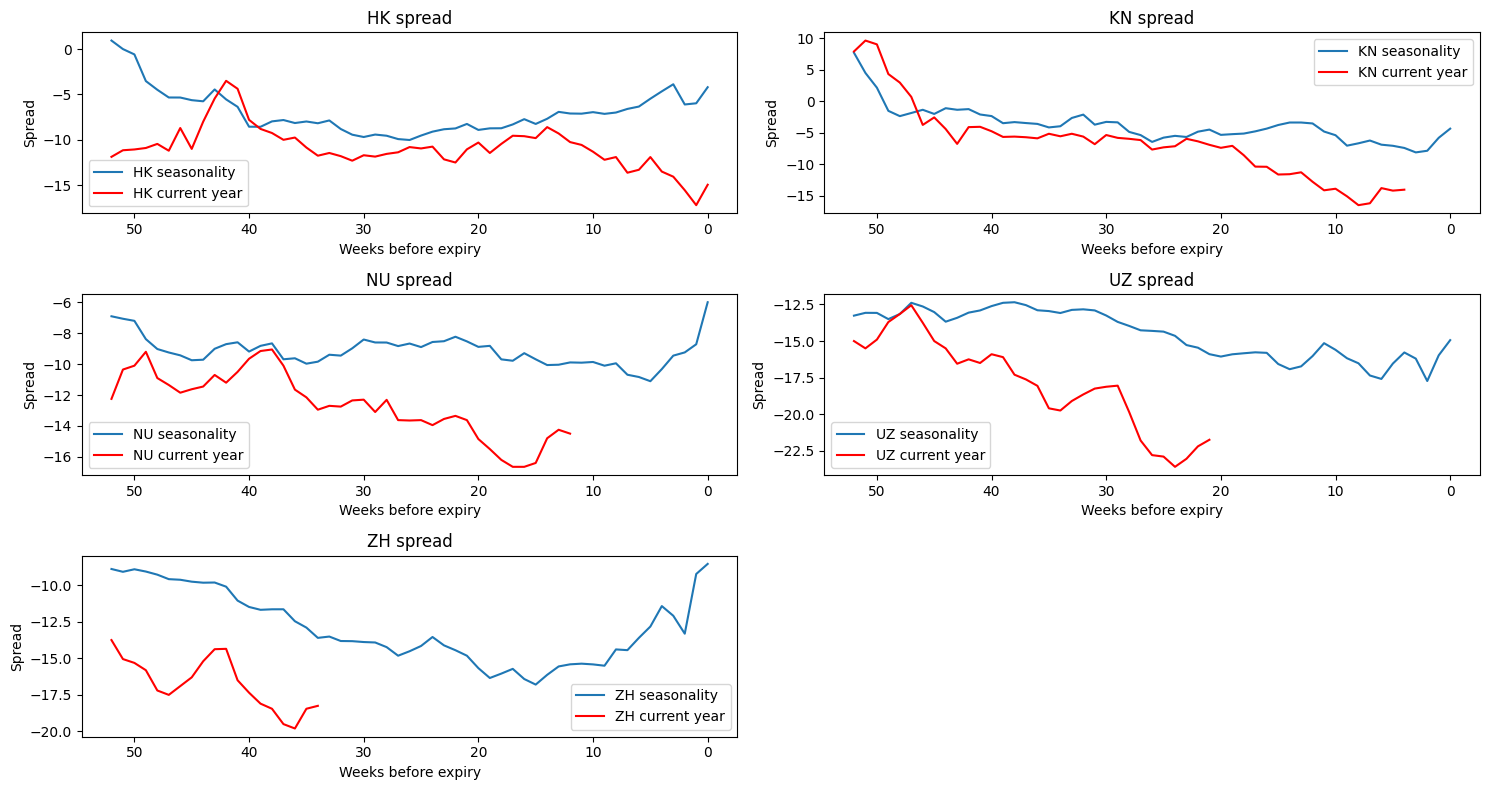

In [44]:
datasets = [
    (hk_season, hk_current, (0, 0), "HK"),
    (kn_season, kn_current, (0, 1), "KN"),
    (nu_season, nu_current, (1, 0), "NU"),
    (uz_season, uz_current, (1, 1), "UZ"),
    (zh_season, zh_current, (2, 0), "ZH")
]

fig, ax = plt.subplots(3, 2, figsize=(15, 8))

for season, current, (i, j), name in datasets:
    ax[i, j].plot(season.index, season["Spread"], label=name + " seasonality")
    ax[i, j].plot(current["Weeks_Before_Expiry"], current["Spread"], label=name + " current year", color="red")
    ax[i, j].set_title(name + " spread")
    ax[i, j].xaxis.set_inverted(True)
    ax[i, j].set_xlabel('Weeks before expiry')
    ax[i, j].set_ylabel("Spread")
    ax[i, j].legend()
fig.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()